In [1]:
# 1. import library 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
# 2. load data

data = "C:/Users/syaki/Documents/YAYASAN PENERAJU/WEEK 7 & 8 - DS06 ML 1/DATA/car_evaluation.csv"

df = pd.read_csv(data, header=None)

In [4]:
df.shape

(1728, 7)

In [5]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
# add feature name buying, maintenance cost, number of doors in car, person capacity, size of luggage boots, safety level of cars and class

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
df.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
def show(df):
  for i in df.columns[:]:
    print("Feature: {} with {} Levels".format(i,df[i].unique()))

show(df)

Feature: buying with ['vhigh' 'high' 'med' 'low'] Levels
Feature: maint with ['vhigh' 'high' 'med' 'low'] Levels
Feature: doors with ['2' '3' '4' '5more'] Levels
Feature: persons with ['2' '4' 'more'] Levels
Feature: lug_boot with ['small' 'med' 'big'] Levels
Feature: safety with ['low' 'med' 'high'] Levels
Feature: class with ['unacc' 'acc' 'vgood' 'good'] Levels


In [10]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [11]:
# 3. find feature selection and target variable. What we are seaching are the 'class' for car evaluation

X = df.drop(['class'], axis=1) # feature

y = df['class'] # target variable

In [12]:
# 4. split X and Y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # 80% training and 20% testing

In [13]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1382, 6), (346, 6))

In [14]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [15]:
X_train.head(8)

,buying,maint,doors,persons,lug_boot,safety
107,vhigh,vhigh,5more,more,big,high
901,med,vhigh,3,4,small,med
1709,low,low,5more,2,big,high
706,high,med,4,2,med,med
678,high,med,3,2,med,low
722,high,med,4,more,small,high
429,vhigh,low,5more,more,big,low
679,high,med,3,2,med,med


In [16]:
# import category encoders since all variable are categorical data

import category_encoders as ce

In [17]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [18]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3


In [19]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,4,4,3,3,3,1
1201,2,2,4,2,3,2
628,4,4,1,3,1,2
1498,3,4,1,2,3,2
1263,2,2,3,1,3,3


In [20]:
# 5. Build Decision Tree Model. import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [21]:
# 5.1 DecisionTreeClassifier model with criterion='gini'

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# train Decision Tree Classifer

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [22]:
# predict the response for test dataset

y_pred_gini = clf_gini.predict(X_test)

In [23]:
# 6. evaluate model. check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

# Here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.

Model accuracy score with criterion gini index: 0.8179


In [24]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'acc'],
      dtype=object)

In [25]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8025


In [26]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8025
Test set score: 0.8179


[Text(0.6666666666666666, 0.875, 'x[5] <= 2.5\ngini = 0.452\nsamples = 1382\nvalue = [301, 58, 975, 48]'),
 Text(0.5, 0.625, 'x[3] <= 2.5\ngini = 0.577\nsamples = 913\nvalue = [301, 58, 506, 48]'),
 Text(0.3333333333333333, 0.375, 'x[1] <= 1.5\ngini = 0.631\nsamples = 615\nvalue = [301, 58, 208, 48]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.462\nsamples = 149\nvalue = [54, 0, 95, 0]'),
 Text(0.5, 0.125, 'gini = 0.634\nsamples = 466\nvalue = [247, 58, 113, 48]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 298\nvalue = [0, 0, 298, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 469\nvalue = [0, 0, 469, 0]')]

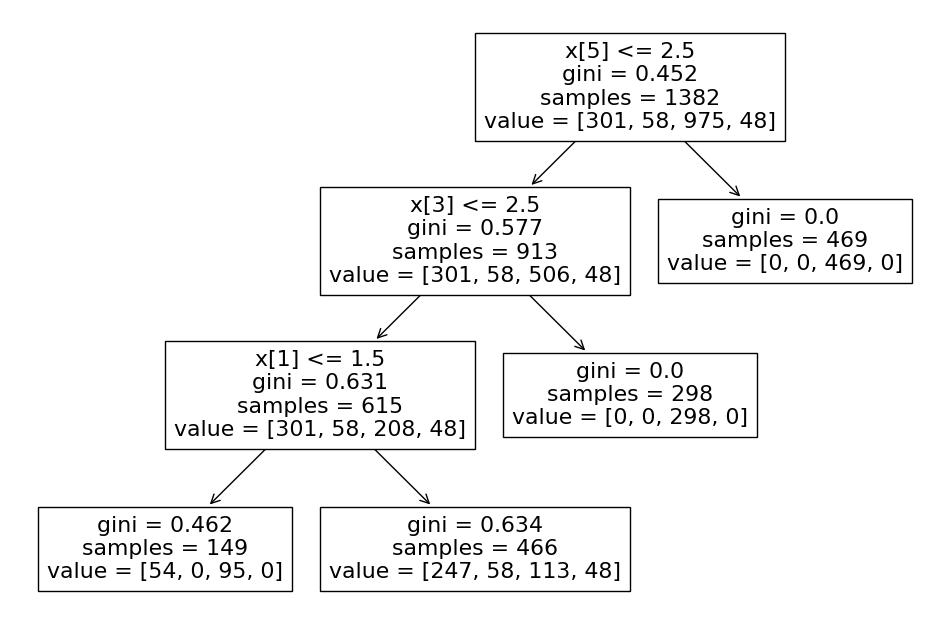

In [27]:
# 7. visualize the model

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

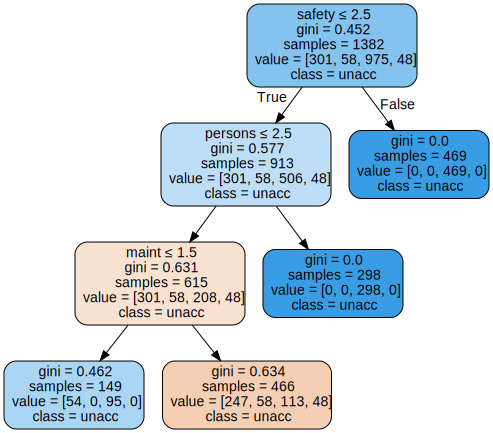

In [28]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 
graph.render('C:/Users/syaki/Documents/DT-Car/DT Model Gini', format='png')
graph 

In [29]:
# 8. optimize decision tree performance with criterion = 'entropy'

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# train Decision Tree Classifer

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [30]:
# predict the response for test dataset

y_pred_en = clf_en.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8179


In [32]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'acc'],
      dtype=object)

In [33]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8025


[Text(0.6666666666666666, 0.875, 'x[5] <= 2.5\nentropy = 1.194\nsamples = 1382\nvalue = [301, 58, 975, 48]'),
 Text(0.5, 0.625, 'x[3] <= 2.5\nentropy = 1.476\nsamples = 913\nvalue = [301, 58, 506, 48]'),
 Text(0.3333333333333333, 0.375, 'x[1] <= 1.5\nentropy = 1.642\nsamples = 615\nvalue = [301, 58, 208, 48]'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.945\nsamples = 149\nvalue = [54, 0, 95, 0]'),
 Text(0.5, 0.125, 'entropy = 1.693\nsamples = 466\nvalue = [247, 58, 113, 48]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 298\nvalue = [0, 0, 298, 0]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 469\nvalue = [0, 0, 469, 0]')]

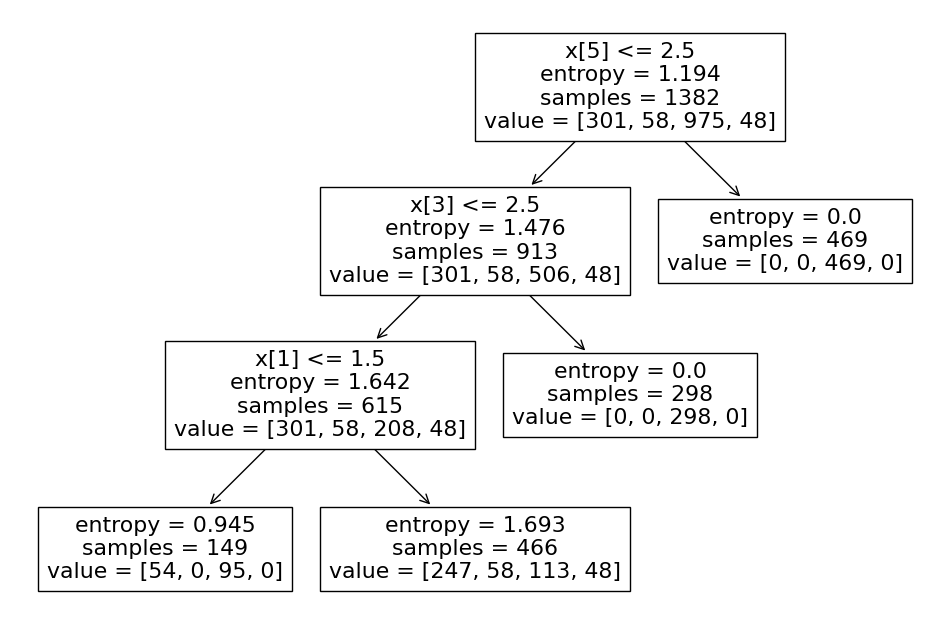

In [34]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

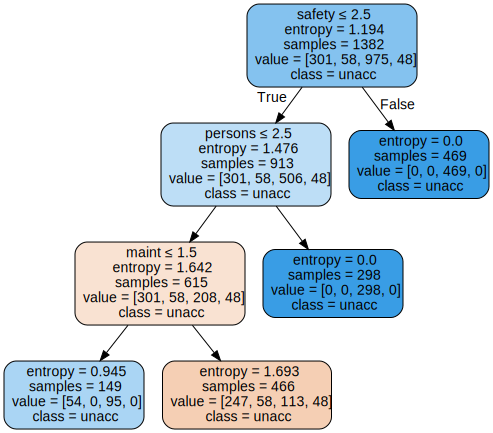

In [35]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 
graph.render('C:/Users/syaki/Documents/DT-Car/DT Model Entropy', format='png')
graph 

Text(0.5, 23.52222222222222, 'Predicted label')

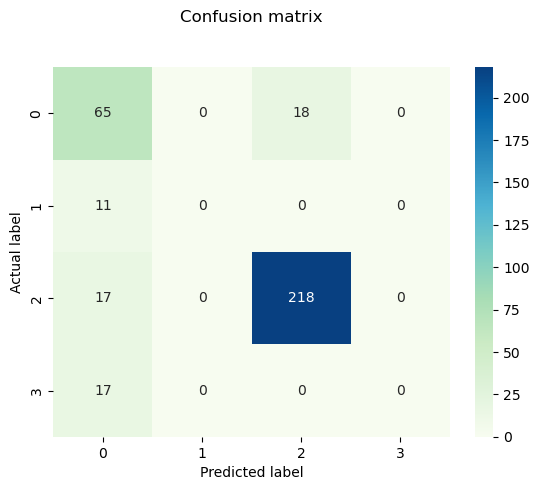

In [36]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

#print('Confusion matrix\n\n', cm)

p = sns.heatmap(pd.DataFrame(cm), annot=True,cmap="GnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.59      0.78      0.67        83
        good       0.00      0.00      0.00        11
       unacc       0.92      0.93      0.93       235
       vgood       0.00      0.00      0.00        17

    accuracy                           0.82       346
   macro avg       0.38      0.43      0.40       346
weighted avg       0.77      0.82      0.79       346

